<br>
<br>

<p style='color:red;'><b>본 실습 중 다뤄지는 코드의 경우 구글 번역 웹사이트의 정책 및 소스코드 변경에 따라 일부가 정상적으로 작동하지 않을 수 있습니다.</b></p>
<p style='color:red;'>구글 번역 웹사이트의 구조 변경으로 인해 코드가 실행되지 않을 시, 각 <b>태그의 XPath(XML Path Language)를 복사하여 덮어쓰기</b>할 경우 작동될 가능성이 높습니다.</p>

In [ ]:
!pip install selenium==4.1.0

In [ ]:
!pip install webdriver-manager==3.5.2

#### Selenium & Driver(for browser) 준비

- Selenium : http://selenium-python.readthedocs.io/ 에서 공식 문서 확인 가능
- ~~ChromeDriver 다운로드 후 작업 폴더에 위치시키기~~ (Webdriver-manager 라이브러리를 활용해 자동으로 다운로드 가능)

In [1]:
from webdriver_manager.chrome import ChromeDriverManager # 자동으로 크롬드라이버(가상브라우저) 파일을 다운로드해주는 라이브러리
from selenium.webdriver.chrome.service import Service # 다운로드된 크롬드라이버 파일을 연결하기 위해 활용

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup 
import time
import pandas as pd

import warnings
warnings.filterwarnings("ignore") # 불필요한 Warning 메시지를 꺼줍니다.

<br>
<br>

## 1. Selenium 둘러보기

In [3]:
df = pd.read_excel('result_220202_1834.xlsx')
df.head()

In [ ]:
# 활용 중인 개발환경에 따라 Selenium 4.1.0 버전 혹은 Webdriver-manager 3.5.2 버전이 문제를 일으킬 수 있습니다.
# 그러한 경우에는 selenium 버전을 낮추고 아래와 같은 절차를 통해 예전 방식으로 가상브라우저를 띄울 수 있습니다.


# 1. cmd를 관리자권한으로 실행 후, 아래 명령어를 입력하여 Selenium 버전을 다운그레이드합니다.

# pip install selenium==3.11.0


# 2. 아래 코드를 Jupyter notebook에 입력해 가상브라우저를 띄웁니다. ('(driver) chromedriver.exe' 파일이 ipynb 파일 옆에 있어야 합니다.)

# driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 


# 3-1. 만약 위 코드 실행 시 [ WebDriverException (cannot find Chrome binary) ] 관련 에러가 발생하면,
#    실제 크롬 브라우저가 설치된 경로를 찾으셔서 아래와 같이 Chrome의 option값을 세팅해주세요. (options.binary_location 변수)

# from selenium.webdriver.chrome.options import Options
# options = Options()
# options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe" # 실제 크롬 브라우저 설치 경로를 찾아 변경 후 적용
# driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe', chrome_options=options) # webdriver 실행 시마다 동일하게 작성


# 3-2. 혹은 위와 같은 코드 상의 변경 대신 https://chromedriver.chromium.org/downloads 에서 
#      현재 설치된 크롬 브라우저의 버전과 동일한 버전의 ChromeDriver를 다운로드 받아,
#      코드를 실행하고 있는 ipynb 파일과 동일한 폴더 내의 '(driver) chromedriver.exe' 파일을 대체해주셔도 문제가 해결될 수 있습니다.


# * MacOS의 경우 참고 : Mac OS 환경에서 Selenium Driver Path 설정하기 : https://j.mp/3reMri7

In [11]:
# 자동으로 크롬드라이버(가상브라우저) 파일을 다운로드 후 세팅
service = Service(executable_path=ChromeDriverManager().install()) 

# 세팅된 크롬드라이버를 연결해 가상브라우저 실행
driver = webdriver.Chrome(service=service)

In [ ]:
# driver.maximize_window() # 가상 브라우저를 최대화하고 싶을 때 활용하세요

In [12]:
translate_url = 'https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko' 
# hl=ko : Korean & tl=en : English

driver.get(translate_url) 
print(driver.current_url)

https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko


<br>

## 문장 번역 & 크롤링

![image.png](attachment:image.png)

<p style='color:red;'>위 스크린샷 화면과 같이 개발자도구에서 원본 텍스트를 입력받는 태그를 찾은 후,</p>
<p><b style='color:red;'>개발자도구 영역에서 우클릭 -> "Copy" -> "Copy full XPath" 를 클릭해 XPath를 복사해옵니다. </b>(<a href='https://testmanager.tistory.com/121'>XPath란?</a>)</p> 

In [13]:
origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[1]/span/span/div/textarea'

driver.find_element_by_xpath(origin_xpath).send_keys('파이썬은 쉽습니다') # 기존 방식
# driver.find_element(By.XPATH, origin_xpath).send_keys('...') # 새로운 방식 (원할 경우 활용하세요)

![image.png](attachment:image.png)

<p style='color:red;'>번역 결과 역시도 마찬가지로 위 스크린샷 화면과 같이 개발자도구에서 태그를 찾은 후,</p>
<p><b style='color:red;'>개발자도구 영역에서 우클릭 -> "Copy" -> "Copy full XPath" 를 클릭해 XPath를 복사해옵니다. </b></p> 

In [14]:
translation_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[2]/div[8]/div/div[1]/span[1]/span/span'

translated_contents = driver.find_element_by_xpath(translation_xpath)

print(translated_contents)
print(translated_contents.text)

<selenium.webdriver.remote.webelement.WebElement (session="086fbac4cac0a2391f743ecfdd41bce6", element="0.3274313395464634-2")>
Python is easy


<br>

## 기사글 번역 & 크롤링

In [15]:
article = df['Article'][0]

origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[1]/span/span/div/textarea'
driver.find_element_by_xpath(origin_xpath).clear()
driver.find_element_by_xpath(origin_xpath).send_keys(article)
time.sleep(3)

translation_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[2]/div[8]/div/div[1]/span[1]/span/span'
translated_contents = driver.find_element_by_xpath(translation_xpath).text

print('기사글 [ {} ] 의 번역이 끝났습니다.'.format(df['Title'][0]))
print(translated_contents)

기사글 [ 인천테크노파크, 중소기업 빅데이터 지원사업 '우수' 등급 ] 의 번역이 끝났습니다.
[Incheon = News] Lee Lavin reporter = Incheon Techno Park logo. (Image = Incheon Techno Park) [Incheon = News] Lee Rubi reporter = Incheon Techno Park said, "Small and Medium Business Big Data Analysis and Application Support Project" We received 'excellent' rating in national evaluation. This support project connects data specialized companies with SMEs and Big Data Analysis solutions to help the company's Big Data Analysis and Use, and Incheon TP has been selected for two consecutive years on the contest for the Korea Intelligence Information Society (NIA) since 2020 We have been pursuing business. Incheon TP led to corporate growth, supporting customized consulting of data specialized in 28 small and medium-sized businesses in Incheon area, which is difficult to use in the Incheon area, which is difficult to utilize Big Data due to labor costs and cost issues last year, and cost problems. Smart Street Lamp Developer Co., Ltd. Eco 

In [16]:
driver.close()
driver.quit()

<br>
<br>

## 2. 기사 원문 전체 번역 (시간이 오래 걸립니다 & 중간에 IP가 막힐 수 있습니다)

In [ ]:
# eng_contents = []

# service = Service(executable_path=ChromeDriverManager().install()) 
# driver = webdriver.Chrome(service=service)

# translate_url = 'https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko' 
# driver.get(translate_url) 
# print(driver.current_url)
# time.sleep(3)

# for row_index, row in df.iterrows():
#     origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[1]/span/span/div/textarea'
#     driver.find_element_by_xpath(origin_xpath).clear()
#     driver.find_element_by_xpath(origin_xpath).send_keys(df['Article'][row_index])
#     time.sleep(3)

#     translation_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[2]/div[8]/div/div[1]/span[1]/span/span'
#     translated_contents = driver.find_element_by_xpath(translation_xpath).text
#     eng_contents.append(translated_contents)
#     print('기사글 [ {} ] 의 번역이 끝났습니다.'.format(df['Title'][row_index]))

# print('전체 contents 번역이 끝났습니다!')

# driver.close()
# driver.quit()


# df['Translated_article'] = eng_contents
# df.to_excel('translation_result.xlsx', index=False, encoding='utf-8')

# print('crawling_result.xlsx 파일로 전체 저장이 완료되었습니다!')

<br>
<br>

## 3. 한글 word_dict에서 상위 항목만 단어로 가져와 번역

In [4]:
from collections import Counter
from konlpy.tag import Okt

articles = df['Article'].tolist()
articles = ''.join(articles)

tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(articles, norm=True, stem=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])

word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
# sorted_word_dic

In [18]:
# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내어 번역을 진행합니다. (늘릴 수 있습니다.)

translation_target = sorted_word_dic[:100] 
translation_target[-1] # 상위 100번째에 해당하는 단어의 빈도수를 확인합니다.

('선보이다', 24)

In [19]:
translation_target = {}
for key in word_dic:
    if word_dic[key] >= 24: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어를 선정합니다.
        translation_target[key] = word_dic[key]

In [20]:
print(translation_target)

{'제공': 85, '빅데이터': 115, '분석': 252, '활용': 102, '지원': 50, '사업': 86, '평가': 26, '받다': 31, '밝히다': 50, '솔루션': 49, '데이터': 538, '기업': 96, '늘다': 71, '한국': 37, '지능': 34, '추진': 43, '오다': 41, '지난해': 60, '지역': 62, '성장': 28, '스마트': 24, '개발': 89, '플랫폼': 59, '서비스': 154, '관리': 56, '시장': 59, 'AI': 61, '기반': 68, '시스템': 69, '투자': 37, '통해': 83, '새롭다': 35, '비즈니스': 31, '전환': 37, '계획': 45, '구축': 46, '서울': 44, '이상': 27, '기술': 93, '관련': 28, '위해': 48, '사례': 27, '함께': 24, '대다': 25, '사용': 24, '정보': 44, '올해': 46, '예측': 30, '보험': 38, '경제': 32, '대상': 26, '적용': 28, '대표': 50, '크다': 44, '분야': 43, '가다': 45, '결과': 32, '따르다': 30, '특히': 27, '이번': 40, '라며': 25, '대한': 41, 'KT': 37, '선보이다': 24, '전략': 31, '고객': 86, '수요': 29, '이용': 26, '보다': 26, '코로나': 43, '19': 31, '산업': 50, '환경': 43, '디지털': 70, '혁신': 51, '업계': 24, '예정': 33, '통합': 31, '증가': 34, '클라우드': 25, '변화': 24, '기관': 24, '가장': 29, '많다': 31, '공공': 40, '개방': 33, '다양하다': 51, '평균': 30, '높다': 39, '자산': 35, '미래': 30, '대비': 24, '범죄': 38, '정부': 30, '카드': 49, '상품': 40, '소비': 26, 'L

In [30]:
translation_result = {}

service = Service(executable_path=ChromeDriverManager().install()) 
driver = webdriver.Chrome(service=service)

translate_url = 'https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko'
driver.get(translate_url) 
print(driver.current_url)
time.sleep(3)

https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko


In [ ]:
# 만약 바로 아래 Cell 실행 시 [ NoSuchElementException (no such element: Unable to locate element) ] 에러가 발생하면,
# 네트워크 속도 등의 이슈로 인해 3초라는 사전에 설정된 시간 동안 기다렸으나 번역 결과가 아직 생성되지 않은 것입니다. (HTML Tag가 로딩되지 않음)

# 혹은 [ 서로 다른 한글 형태소 값에 대한 번역 결과로 연속적으로 동일한 영문 단어가 print되는 현상 ]도 동일한 원인에 기인합니다.
# 따라서 네트워크 속도에 따라 아래 time.sleep(3)에서 3을 5~7으로 증가시켜주면 보다 안정적으로 결과를 받아올 수 있습니다.

In [31]:
for key in translation_target: # 상위 100번째 빈도수에 해당하는 단어까지 담겨있는 dict
    
    origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[1]/span/span/div/textarea'
    driver.find_element_by_xpath(origin_xpath).clear()
    driver.find_element_by_xpath(origin_xpath).send_keys(key)
    time.sleep(3) # 네트워크의 속도에 따라 잠깐씩 쉬어주면서 진행합니다.

    translated_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[2]/div[8]/div/div[1]/span[1]/span/span'
    translated_contents = driver.find_element_by_xpath(translated_xpath).text
    
    translation_result[translated_contents] = translation_target[key] # 번역이 완료된 단어 dict의 value로 기존 dict의 value를 꽂아줍니다.
    print('단어 {}의 번역 완료 : {}'.format(key, translated_contents))

print('전체 번역이 끝났습니다!')

driver.close()
driver.quit()

단어 제공의 번역 완료 : offer
단어 빅데이터의 번역 완료 : Big Data
단어 분석의 번역 완료 : analyze
단어 활용의 번역 완료 : uses
단어 지원의 번역 완료 : support
단어 사업의 번역 완료 : business
단어 평가의 번역 완료 : evaluation
단어 받다의 번역 완료 : Receive
단어 밝히다의 번역 완료 : clarify
단어 솔루션의 번역 완료 : solution
단어 데이터의 번역 완료 : data
단어 기업의 번역 완료 : Enterprise
단어 늘다의 번역 완료 : gain
단어 한국의 번역 완료 : Korea
단어 지능의 번역 완료 : Intellect
단어 추진의 번역 완료 : propel
단어 오다의 번역 완료 : come
단어 지난해의 번역 완료 : Last year
단어 지역의 번역 완료 : area
단어 성장의 번역 완료 : growth
단어 스마트의 번역 완료 : smart
단어 개발의 번역 완료 : Development
단어 플랫폼의 번역 완료 : platform
단어 서비스의 번역 완료 : service
단어 관리의 번역 완료 : management
단어 시장의 번역 완료 : market
단어 AI의 번역 완료 : TO THE
단어 기반의 번역 완료 : base
단어 시스템의 번역 완료 : system
단어 투자의 번역 완료 : invest
단어 통해의 번역 완료 : through
단어 새롭다의 번역 완료 : new
단어 비즈니스의 번역 완료 : business
단어 전환의 번역 완료 : transform
단어 계획의 번역 완료 : plan
단어 구축의 번역 완료 : build
단어 서울의 번역 완료 : Seoul
단어 이상의 번역 완료 : More than
단어 기술의 번역 완료 : Technology
단어 관련의 번역 완료 : relation
단어 위해의 번역 완료 : for
단어 사례의 번역 완료 : case
단어 함께의 번역 완료 : together
단어 대다의 번역 완료 : 

In [34]:
translation_result['It'] # 구글 번역 서비스의 성능 향상에 따라 정상적으로 번역이 진행될 시 해당 key는 들어있지 않을 수 있습니다.

61

In [35]:
# 구글 번역 서비스의 성능 향상에 따라 정상적으로 번역이 진행될 시 아래 코드는 필요하지 않을 수 있습니다. ("AI" & "가다" 번역 결과 확인)

translation_result['AI'] = translation_result['It'] # AI 
translation_result['go'] = translation_result['good morning my love'] # 가다

del translation_result['It']
del translation_result['good morning my love']

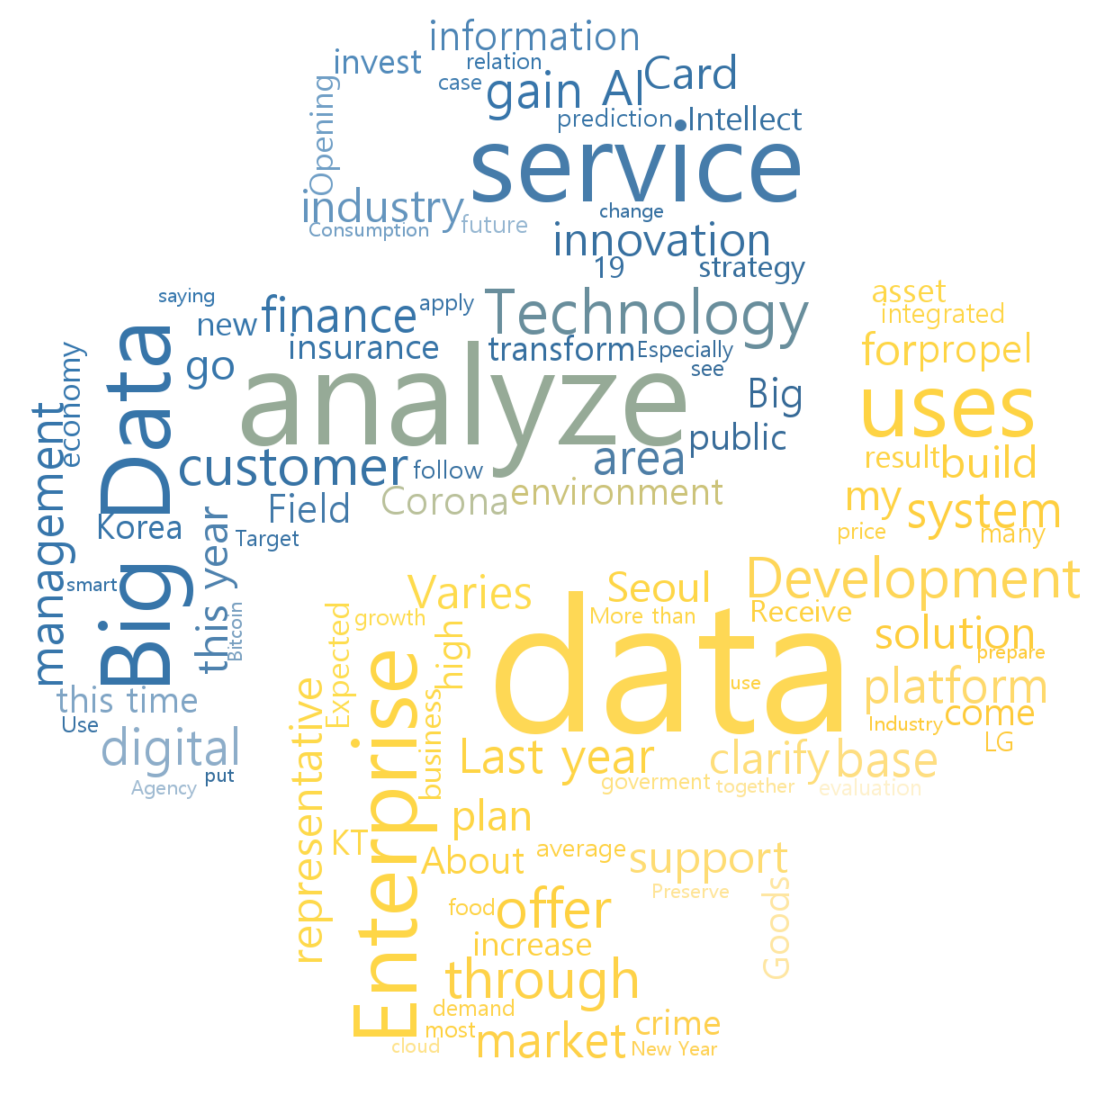

In [36]:
from PIL import Image 
from wordcloud import WordCloud, ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

python_coloring = np.array(Image.open("python_mask.jpg"))
image_colors = ImageColorGenerator(python_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=python_coloring, 
                       background_color='white').generate_from_frequencies(translation_result)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.recolor(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [56]:
word_cloud.to_file('test.png')

<br>

## (Appendix 1) 네이버 파파고를 활용한 번역 (find_element_by_id 활용)

In [5]:
service = Service(executable_path=ChromeDriverManager().install()) 
driver = webdriver.Chrome(service=service)

In [6]:
translate_url = 'https://papago.naver.com/?sk=ko&tk=en'
# sk=ko : Korean & tk=en : English

driver.get(translate_url) 
print(driver.current_url)

https://papago.naver.com/?sk=ko&tk=en


![image.png](attachment:image.png)

In [7]:
driver.find_element_by_id('txtSource').send_keys('파이썬은 쉽습니다.') # Send_keys

![image.png](attachment:image.png)

In [8]:
translated_contents = driver.find_element_by_id('txtTarget')
print(translated_contents.text)

driver.close()
driver.quit()

Python is easy.


![image.png](attachment:image.png)

<p>파파고 번역 웹사이트의 경우 번역 키워드 입력 후 번역된 결과가 노출될 때까지의 간격이 긴 편입니다.</p>
<p>이를 일정한 시간(ex. 3초)으로 지정해 기다릴 경우 종종 <b>번역이 채 끝나지 않은 상태에서 잘못된 번역 결과를 가져오게 됩니다.</b></p>

<br>

<p>번역이 성공적으로 종료된 시점에만 눈 앞에 나타나는 어떠한 태그가 있을 경우, </p>
<p>우리는 <b style='color:red;'>이 태그가 눈 앞에 나타날 때까지 대기하여 (특정한 시간만큼 기다리는 대신) 번역 완료 시까지 유동적으로 기다릴 수 있습니다.</b> </p>

<br>

<p>위 스크린샷에서 <b style='color:red;'>번역이 완료될 경우 나타나는 발음(diction)이 담긴 태그("diction_~" class를 가진 p 태그)</b>가 바로 그러한 태그입니다.</p>
<p>실제로 <b>위 p 태그는 매 번역 키워드 입력 시마다 잠시 동안 사라졌다가 번역이 마쳐지면 다시 나타납니다.</b></p>
<p>우리는 아래 코드에서 <b>expected_conditions</b>를 활용해 이와 같은 <b style='color:red;'>특정한 태그의 로딩이 완료될 때까지 기다린 후</b> 번역 결과를 가져올 수 있습니다.</p>

<hr>

## 아래 cell 실행 후에는 가상브라우저를 화면 가장 앞에 띄워 활성화된 상태를 유지해주세요.

<br>

- 인터넷 환경 혹은 컴퓨터 환경(메모리 용량 등)에 따라 실행이 원활하지 않을 수 있습니다. (동일한 번역 결과값이 반복하여 출력됨)
- 이러한 경우 Zoom 등 메모리를 많이 차지하는 프로그램들을 종료하고 높은 인터넷 속도가 확보된 상태에서 다시 시도해보시길 권장드립니다.

<hr>

In [43]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By


translation_result_papago = {}

service = Service(executable_path=ChromeDriverManager().install()) 
driver = webdriver.Chrome(service=service)

translate_url = 'https://papago.naver.com/?sk=ko&tk=en'
driver.get(translate_url) 
print(driver.current_url)
time.sleep(3)
    
for key in translation_target: # 상위 100번째 빈도수에 해당하는 단어까지 담겨있는 dict
    
    driver.find_element_by_id('txtSource').clear()
    driver.find_element_by_id('txtSource').send_keys(key)
    time.sleep(3) # 네트워크의 속도에 따라 잠깐씩 쉬어주면서 진행합니다.

    wait = WebDriverWait(driver, timeout=10) # timeout : 지정한 조건의 충족까지 대기할 최대 시간 (만약 10초 내에 충족되지 않으면 에러가 발생)
    wait.until(expected_conditions.presence_of_element_located((By.CSS_SELECTOR, "#targetEditArea > p")))
    # 위 CSS Selector로 지정한 Tag의 존재가 포착될 때까지 대기 후 아래 코드를 실행 (가능한 조건 전체 목록 @ https://j.mp/3mCnc5G)
    
    translated_contents = driver.find_element_by_id('txtTarget').text
    
    translation_result_papago[translated_contents] = translation_target[key] # 번역이 완료된 단어 dict의 value로 기존 dict의 value를 꽂아줍니다.
    print('단어 {}의 번역 완료 : {}'.format(key, translated_contents))

print('전체 번역이 끝났습니다!')

driver.close()
driver.quit()

https://papago.naver.com/?sk=ko&tk=en
단어 제공의 번역 완료 : Provision
단어 빅데이터의 번역 완료 : Big data.
단어 분석의 번역 완료 : Analysis
단어 활용의 번역 완료 : application
단어 지원의 번역 완료 : Support
단어 사업의 번역 완료 : Business
단어 평가의 번역 완료 : Evaluation
단어 받다의 번역 완료 : Get it.
단어 밝히다의 번역 완료 : Disembosom
단어 솔루션의 번역 완료 : Solution.
단어 데이터의 번역 완료 : Data
단어 기업의 번역 완료 : Corporation
단어 늘다의 번역 완료 : increase
단어 한국의 번역 완료 : Korea
단어 지능의 번역 완료 : Intelligence.
단어 추진의 번역 완료 : Promotion.
단어 오다의 번역 완료 : Come
단어 지난해의 번역 완료 : Last year.
단어 지역의 번역 완료 : Area
단어 성장의 번역 완료 : Growth
단어 스마트의 번역 완료 : Smart
단어 개발의 번역 완료 : Development
단어 플랫폼의 번역 완료 : Platform.
단어 서비스의 번역 완료 : Service
단어 관리의 번역 완료 : Taking care of myself.
단어 시장의 번역 완료 : market
단어 AI의 번역 완료 : AI
단어 기반의 번역 완료 : Base.
단어 시스템의 번역 완료 : System
단어 투자의 번역 완료 : Investment
단어 통해의 번역 완료 : Through
단어 새롭다의 번역 완료 : New.
단어 비즈니스의 번역 완료 : Business
단어 전환의 번역 완료 : change
단어 계획의 번역 완료 : Plans.
단어 구축의 번역 완료 : build
단어 서울의 번역 완료 : Seoul
단어 이상의 번역 완료 : More than
단어 기술의 번역 완료 : skill
단어 관련의 번역 완료 : Relevant


<br>

## (Appendix 2) 인터파크 투어 크롤링 예시

In [44]:
print('http://tour.interpark.com/')

http://tour.interpark.com/


In [45]:
service = Service(executable_path=ChromeDriverManager().install()) 
driver = webdriver.Chrome(service=service)

driver.get('http://tour.interpark.com/')
driver.current_url

'http://tour.interpark.com/'

In [46]:
driver.find_element_by_id('SearchGNBText').send_keys('보라카이')
driver.find_element_by_class_name('search-btn').click()

In [43]:
# driver.implicitly_wait(5)

In [47]:
driver.page_source
web_page = BeautifulSoup(driver.page_source, 'html.parser')
# web_page

In [ ]:
driver.find_element_by_class_name('moreBtn').click()

![image.png](attachment:image.png)

In [52]:
# 2페이지로 페이지 변경

driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div[2]/div[3]/div[2]/div[3]/ul/li[2]').click()

In [54]:
# 1페이지로 페이지 변경

# driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div[2]/div[3]/div[2]/div[3]/ul/li[1]').click()

In [55]:
driver.close()
driver.quit()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b844bbc7-67c4-4320-a052-bd9703f8a211' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>